In [1]:
import os
print(os.path.exists("cube.obj")) 

True


In [2]:
import mitsuba as mi
import matplotlib.pyplot as plt
import numpy as np
import colorsys

mi.set_variant('scalar_rgb')

def light_grid(face, n1, n2, const_val):
    positions = []
    if face == "top":
        # Top face
        xs = np.linspace(-4, 4, n1)
        zs = np.linspace(-4, 4, n2)
        for x in xs:
            for z in zs:
                positions.append((face, [x, const_val, z]))
    elif face == "back":
        # Back face
        xs = np.linspace(-4, 4, n1)
        ys = np.linspace(-4, 4, n2)
        for x in xs:
            for y in ys:
                positions.append((face, [x, y, const_val]))
    elif face == "left" or face == "right":
        # Left face
        ys = np.linspace(-4, 4, n1)
        zs = np.linspace(-4, 4, n2)
        for y in ys:
            for z in zs:
                positions.append((face, [const_val, y, z]))
    # elif face == "right":
    #     # Right face
    #     ys = np.linspace(-4, 4, n1)
    #     zs = np.linspace(-4, 4, n2)
    #     for y in ys:
    #         for z in zs:
    #             positions.append((face, [const_val, y, z]))
    return positions

# 10 x 15 = 150 lights
top_pos   = light_grid("top",   10, 15,  4.5)   
back_pos  = light_grid("back",  10, 15, -4.5)  
left_pos  = light_grid("left",  10, 15, -4.5)  
right_pos = light_grid("right", 10, 15,  4.5)     

all_pos = top_pos + back_pos + left_pos + right_pos
print("Total light emitters:", len(all_pos))  

def rainbow(i, total):
    hue = i / total
    saturation = 1.0
    value = 1.0
    r, g, b = colorsys.hsv_to_rgb(hue, saturation, value)
    # return [r * 1.5, g * 1.5, b * 1.5]
    return [r, g, b]



Total light emitters: 600


In [3]:
import json

color_configs = {
    'RGB': {
        'top':   [1.0, 1.0, 1.0],  
        'back':  [1.0, 0.0, 0.0],  
        'left':  [0.0, 1.0, 0.0], 
        'right': [0.0, 0.0, 1.0], 
    },
    'CMYK': {
        'top':   [0.0, 1.0, 1.0],  
        'back':  [1.0, 0.0, 1.0],  
        'left':  [1.0, 1.0, 0.0], 
        'right': [0.0, 0.0, 0.0],  
    },
    'GRAY': {
        'top':   [1.0, 1.0, 1.0],
        'back':  [0.7, 0.7, 0.7],
        'left':  [0.4, 0.4, 0.4],
        'right': [0.1, 0.1, 0.1],
    },
    'WHITE': {
        'top':   [1.0, 1.0, 1.0],
        'back':  [1.0, 1.0, 1.0],
        'left':  [1.0, 1.0, 1.0],
        'right': [1.0, 1.0, 1.0], 
    },
    'WARM': {
    'top':   [1.0, 0.8, 0.6],  # peach
    'back':  [1.0, 0.5, 0.0],  # orange
    'left':  [1.0, 0.2, 0.2],  # light red
    'right': [0.6, 0.3, 0.1],  # brownish
    },

    'COOL': {
        'top':   [0.6, 0.8, 1.0],  # light blue
        'back':  [0.2, 0.5, 1.0],  # blue
        'left':  [0.2, 0.2, 1.0],  # light purple
        'right': [0.1, 0.3, 0.6],  # dark blue
    },
    'RAINBOW': {
        'top':   [1.0, 0.0, 0.0],  # red
        'back':  [1.0, 0.5, 0.0],  # orange
        'left':  [1.0, 1.0, 0.0],  # yellow
        'right': [0.0, 1.0, 0.0],  # green
    },
    'NEON': {
    'top':   [0.0, 1.0, 0.5],  # neon green
    'back':  [1.0, 0.0, 1.0],  # magenta
    'left':  [1.0, 1.0, 0.0],  # neon yellow
    'right': [0.0, 1.0, 1.0],  # cyan
    },
    'PASTEL': {
        'top':   [1.0, 0.8, 0.8],  # light pink
        'back':  [0.8, 1.0, 0.8],  # light green
        'left':  [0.8, 0.8, 1.0],  # light blue
        'right': [1.0, 1.0, 0.8],  # light yellow
    },
    'SIDES':{
        'top':   [1.0, 1.0, 1.0],  # white
        'back':  [0.0, 0.0, 0.0],  # black
        'left':  [1.0, 1.0, 1.0],  # white
        'right': [0.0, 0.0, 0.0],  # black
    },
    'TOP': {
        'top':   [1.0, 1.0, 1.0],  # white
        'back':  [0.0, 0.0, 0.0],  # black
        'left':  [0.0, 0.0, 0.0],  # black
        'right': [0.0, 0.0, 0.0],  # black
    },
}

with open('color_configs.json', 'w') as f:
    json.dump(color_configs, f, indent=4)

In [4]:
def get_light_color(face, config_name):
     with open('color_configs.json') as f:
          color_configs = json.load(f)

     if config_name not in color_configs:
          raise ValueError(f"Configuration '{config_name}' not found in color_configs.json")
     config = color_configs[config_name]

     color = config.get(face, [0, 0, 0])

     return color

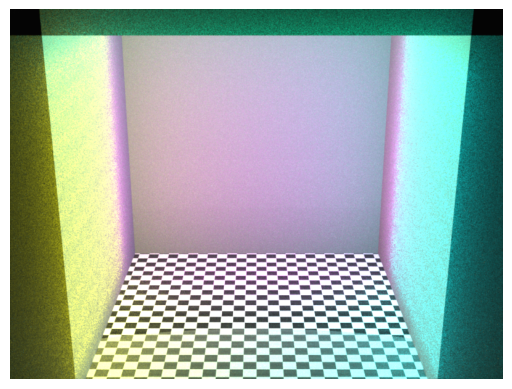

In [15]:
import json

emitters = {}
num_emitters = len(all_pos)
CONFIG = 'NEON'

for i, (face, pos) in enumerate(all_pos):
    # color = rainbow(i, num_emitters) 
    # color = get_light_color(face, 'RGB')
    # color = get_light_color(face, 'CMYK')
    color = get_light_color(face, CONFIG)
    emitters[f"light_{i}"] = {
        "type": "point",
        "position": pos,
        "intensity": {
            "type": "rgb",
            "value": color  # Use the rainbow function's RGB output
        }
    }
    


scene_dict = {
    "type": "scene",
    "integrator": {"type": "path"},
    "sensor": {
        "type": "perspective",
        "sampler": {
            "type": "independent",
            "sample_count": 512
        },
        "to_world": mi.ScalarTransform4f().look_at(
            origin=[0, 7, 20],
            target=[0, 0, 0],
            up=[0, 1, 0]
        ),
        "film": {
            "type": "hdrfilm",
            "width": 800,
            "height": 600,
            "pixel_format": "rgb"
        },
    },
    "env": {
        "type": "constant",
        "radiance": {"type": "rgb", "value": [0.01, 0.01, 0.01]}
    },
    "cube-back":{
        "type": "obj",
        "filename": "cube.obj",
        "to_world": mi.ScalarTransform4f()
            .translate([0, 0, -10])  
        , 
        "bsdf": {
            "type": "twosided",
            "bsdf": {
                "type": "diffuse",
                "reflectance": {"type": "rgb", "value": [0.2, 0.2, 0.2]}
            }
        }
    },

    "cube-top":{
        "type": "obj",
        "filename": "cube.obj",
        "to_world": mi.ScalarTransform4f()
            .translate([0, 10, 0])  
        ,  
        "bsdf": {
            "type": "twosided",
            "bsdf": {
                "type": "diffuse",
                "reflectance": {"type": "rgb", "value": [0.2, 0.2, 0.2]}
            }
        }
    }, 
    "cube-left":{
        "type": "obj",
        "filename": "cube.obj",
        "to_world": mi.ScalarTransform4f()
            .translate([10,0, 0]) 
        ,  
        "bsdf": {
            "type": "twosided",
            "bsdf": {
                "type": "diffuse",
                "reflectance": {"type": "rgb", "value": [0.2, 0.2, 0.2]}
            }
        }
    }, 
    "cube-right":{
        "type": "obj",
        "filename": "cube.obj",
        "to_world": mi.ScalarTransform4f()
            .translate([-10, 0, 0]) 
        , 
        "bsdf": {
            "type": "twosided",
            "bsdf": {
                "type": "diffuse",
                "reflectance": {"type": "rgb", "value": [0.2, 0.2, 0.2]}
            }
        }
    }, 
    "cube-bottom":{
        "type": "obj",
        "filename": "cube.obj",
        "to_world": mi.ScalarTransform4f()
            .translate([0, -10, 0])  
        , 
        "bsdf": {
            "type": "twosided",
            "bsdf": {
                "type": "diffuse",
                "reflectance": {"type": "rgb", "value": [0.2, 0.2, 0.2]}
            }
        }
    },
    "checkerboard": {
        "type": "rectangle",
        "to_world": mi.ScalarTransform4f()
            .translate([0, -5, 0])   # Place it on the ground
            .rotate([1, 0, 0], -90)  # Rotate to lie flat on XZ plane
            .scale([8, 8, 1]),       # Make it a big square
        "bsdf": {
            "type": "diffuse",
            "reflectance": {
                "type": "checkerboard",
                "color0": {"type": "rgb", "value": [1.0, 1.0, 1.0]},
                "color1": {"type": "rgb", "value": [0.0, 0.0, 0.0]},
                "to_uv": mi.Transform4f().scale(mi.Vector3f(20, 20, 1))
            }
        }
    }

}

scene_dict.update(emitters)
scene = mi.load_dict(scene_dict)
img = mi.render(scene)
plt.imshow(mi.util.convert_to_bitmap(img))
plt.axis('off')
plt.savefig(f"output/{CONFIG}.png", dpi=300, bbox_inches='tight')
# plt.show()

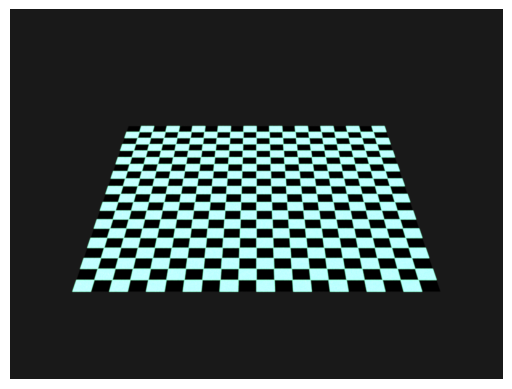

In [16]:
import json

emitters = {}
num_emitters = len(all_pos)
CONFIG = 'NEON'

for i, (face, pos) in enumerate(all_pos):
    # color = rainbow(i, num_emitters) 
    # color = get_light_color(face, 'RGB')
    # color = get_light_color(face, 'CMYK')
    color = get_light_color(face, CONFIG)
    emitters[f"light_{i}"] = {
        "type": "point",
        "position": pos,
        "intensity": {
            "type": "rgb",
            "value": color  # Use the rainbow function's RGB output
        }
    }
    


scene_dict = {
    "type": "scene",
    "integrator": {"type": "path"},
    "sensor": {
        "type": "perspective",
        "sampler": {
            "type": "independent",
            "sample_count": 512
        },
        "to_world": mi.ScalarTransform4f().look_at(
            origin=[0, 0.5, 0.8],
            target=[0, 0, 0],
            up=[0, 1, 0]
        ),
        "film": {
            "type": "hdrfilm",
            "width": 800,
            "height": 600,
            "pixel_format": "rgb"
        },
    },
    "env": {
        "type": "constant",
        "radiance": {"type": "rgb", "value": [0.01, 0.01, 0.01]}
    },
    "checkerboard": {
        "type": "rectangle",
        "to_world": mi.ScalarTransform4f()
            .translate([0, 0, 0])      # Place it on the ground
            .rotate([1, 0, 0], -90)      # Lie flat on XZ
            .scale([0.2, 0.2, 1]),       # 0.2 m × 0.2 m plane
        "bsdf": {
            "type": "diffuse",
            "reflectance": {
                "type": "checkerboard",
                "color0": { "type": "rgb", "value": [1,1,1] },
                "color1": { "type": "rgb", "value": [0,0,0] },
                "to_uv": mi.Transform4f().scale(mi.Vector3f(10, 10, 1))
                # 10 checks across ⇒ each check is 0.2 m / 10 = 0.02 m
            }
        }
    }
}

scene_dict.update(emitters)
scene = mi.load_dict(scene_dict)
img = mi.render(scene)
plt.imshow(mi.util.convert_to_bitmap(img))
plt.axis('off')
plt.savefig(f"output/{CONFIG}.png", dpi=300, bbox_inches='tight')
# plt.show()